In [76]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
import chardet
%matplotlib inline
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False


In [77]:
df = pd.read_csv('police_2.csv', encoding='cp949', index_col=["죄종별"])
test_cpi=pd.read_excel(r'/Users/chan2/Desktop/교내 활동/데이터분석/소비자물가지수.xlsx')

In [78]:
df

,항목,2018,2019,2020,2021,2022
죄종별,,,,,,
사기,발생건수[건],270029,304472,347675,294075,325848
전자금융거래법위반,발생건수[건],7877,8132,6402,7024,9731
횡령,발생건수[건],55113,58508,58889,50421,60220
도박범죄,발생건수[건],6004,8008,8135,6391,4463


In [79]:
#죄종별에서 도박범죄만 남기고 나머지 삭제
#항목 열 삭제

df_crime = df.drop(columns="항목", index=["사기", "전자금융거래법위반", "횡령"])
df_crime

,2018,2019,2020,2021,2022
죄종별,,,,,
도박범죄,6004,8008,8135,6391,4463


In [80]:
#죄종별 삭제
df_crime = df_crime.rename_axis(index={"죄종별":""})

In [81]:
crime_columns=df_crime.columns
crime_first_row=df_crime.iloc[0]
print(crime_first_row)

2018    6004
2019    8008
2020    8135
2021    6391
2022    4463
Name: 도박범죄, dtype: int64


In [82]:
df_crime = pd.DataFrame([crime_first_row.values],index=["도박범죄"],columns=df_crime.columns)
df_crime

,2018,2019,2020,2021,2022
도박범죄,6004,8008,8135,6391,4463


In [83]:
df_crime.columns.name='연도'
df_crime=df_crime.transpose()
df_crime

,도박범죄
연도,
2018,6004
2019,8008
2020,8135
2021,6391
2022,4463


In [84]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018 to 2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   도박범죄    5 non-null      int64
dtypes: int64(1)
memory usage: 252.0+ bytes


In [85]:
#df_crime['도박범죄'] = df_crime['도박범죄'].astype('float64')
#df_crime.info()
#Dtype을 통일시켜주지 않아도 정상적으로 결과 출력됨

In [86]:
test_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      15 non-null     object 
 1   2012    15 non-null     object 
 2   2013    14 non-null     float64
 3   2014    14 non-null     float64
 4   2015    14 non-null     float64
 5   2016    14 non-null     float64
 6   2017    14 non-null     float64
 7   2018    14 non-null     float64
 8   2019    14 non-null     float64
 9   2020    14 non-null     float64
 10  2021    14 non-null     float64
 11  2022    14 non-null     float64
dtypes: float64(10), object(2)
memory usage: 1.7+ KB


In [87]:
cpi = test_cpi.iloc[0:2, [7, 8, 9, 10, 11]]
cpi

,2018,2019,2020,2021,2022
0,99.1,99.5,100.0,102.5,107.7
1,1.5,0.4,0.5,2.5,5.1


In [88]:
cpi_columns=cpi.columns
first_row=cpi.iloc[0]
print(first_row)
second_row=cpi.iloc[1]
print(second_row)

2018     99.1
2019     99.5
2020    100.0
2021    102.5
2022    107.7
Name: 0, dtype: float64
2018    1.5
2019    0.4
2020    0.5
2021    2.5
2022    5.1
Name: 1, dtype: float64


In [89]:
df_cpi = pd.DataFrame([first_row.values, second_row.values],index=["소비자물가 총지수(2020=100)","소비자물가상승률(%)"],columns=cpi.columns)
df_cpi

,2018,2019,2020,2021,2022
소비자물가 총지수(2020=100),99.1,99.5,100.0,102.5,107.7
소비자물가상승률(%),1.5,0.4,0.5,2.5,5.1


In [90]:
df_cpi.columns.name='연도'
df_cpi=df_cpi.transpose()
df_cpi

,소비자물가 총지수(2020=100),소비자물가상승률(%)
연도,,
2018,99.1,1.5
2019,99.5,0.4
2020,100.0,0.5
2021,102.5,2.5
2022,107.7,5.1


In [91]:
print(df_crime.index)
print(df_cpi.index)

Index(['2018', '2019', '2020', '2021', '2022'], dtype='object', name='연도')
Index([2018, 2019, 2020, 2021, 2022], dtype='object', name='연도')


In [92]:
# 연도별의 인덱스가 crime = 문자, cpi = 숫자 형태로 서로 다르므로 crime을 정수형으로 변환
df_crime.index = df_crime.index.astype(int)

In [97]:
cpi_crime = pd.concat([df_cpi, df_crime], axis=1)
cpi_crime

,소비자물가 총지수(2020=100),소비자물가상승률(%),도박범죄
연도,,,
2018,99.1,1.5,6004
2019,99.5,0.4,8008
2020,100.0,0.5,8135
2021,102.5,2.5,6391
2022,107.7,5.1,4463


In [98]:
cpi_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018 to 2022
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   소비자물가 총지수(2020=100)  5 non-null      float64
 1   소비자물가상승률(%)          5 non-null      float64
 2   도박범죄                 5 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 332.0+ bytes


In [99]:
cpi_crime.isnull().sum()

소비자물가 총지수(2020=100)    0
소비자물가상승률(%)            0
도박범죄                   0
dtype: int64

In [100]:
cpi_crime.describe()

,소비자물가 총지수(2020=100),소비자물가상승률(%),도박범죄
count,5.000000,5.000000,5.000000
mean,101.760000,2.000000,6600.200000
std,3.574633,1.931321,1525.152025
min,99.100000,0.400000,4463.000000
25%,99.500000,0.500000,6004.000000
50%,100.000000,1.500000,6391.000000
75%,102.500000,2.500000,8008.000000
max,107.700000,5.100000,8135.000000


In [101]:
cpi_crime.corr(method='pearson')
#총지수와 상승률 모두 음의 상관 관계를 가짐

,소비자물가 총지수(2020=100),소비자물가상승률(%),도박범죄
소비자물가 총지수(2020=100),1.000000,0.954914,-0.786280
소비자물가상승률(%),0.954914,1.000000,-0.932463
도박범죄,-0.786280,-0.932463,1.000000


<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='도박범죄'>

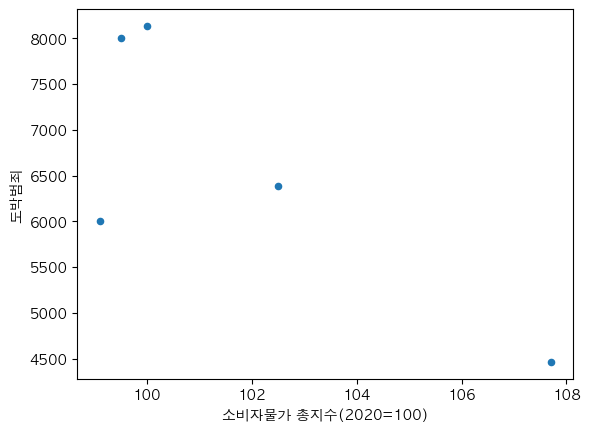

In [102]:
cpi_crime.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='도박범죄')

<Axes: xlabel='소비자물가상승률(%)', ylabel='도박범죄'>

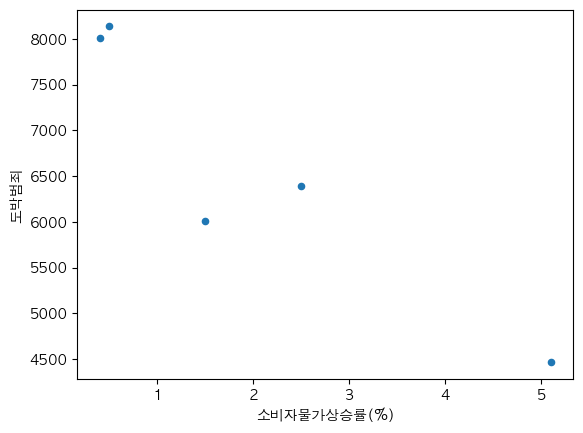

In [103]:
cpi_crime.plot(kind='scatter', x='소비자물가상승률(%)', y='도박범죄')

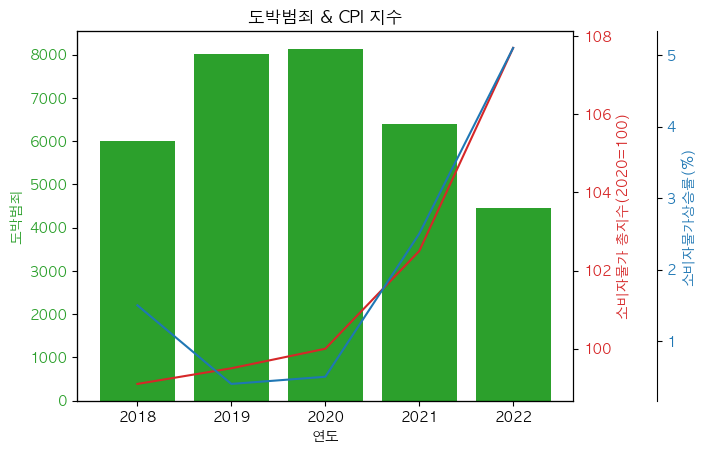

In [112]:
# '연도'는 열이 아닌 인덱스의 이름
# cpi_crime.index를 사용하여 인덱스 값을 x축 데이터로 사용

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('연도')
ax1.set_ylabel('도박범죄', color=color)
ax1.bar(cpi_crime.index, cpi_crime['도박범죄'], color=color)  
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('소비자물가 총지수(2020=100)', color=color)  
ax2.plot(cpi_crime.index, cpi_crime['소비자물가 총지수(2020=100)'], color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  
color = 'tab:blue'
ax3.spines['right'].set_position(('outward', 60))  # 두 번째 y축을 오른쪽에 추가
ax3.set_ylabel('소비자물가상승률(%)', color=color)  
ax3.plot(cpi_crime.index, cpi_crime['소비자물가상승률(%)'], color=color)  
ax3.tick_params(axis='y', labelcolor=color)

plt.title('도박범죄 & CPI 지수')

plt.show()